In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')
%matplotlib inline

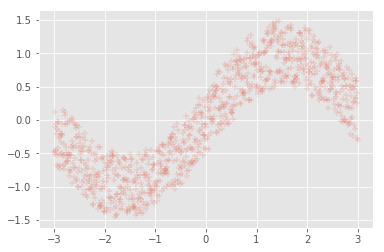

In [3]:
n_observations = 1000

xs = np.linspace(-3,3,n_observations)

ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)

plt.scatter(xs, ys, alpha=0.15, marker='+')

In [4]:
X = tf.placeholder(tf.float32, name='X')

Y = tf.placeholder(tf.float32, name='Y')

(array([   6.,   27.,   71.,  185.,  255.,  232.,  147.,   60.,   12.,    5.]),
 array([-0.32622382, -0.25949258, -0.19276133, -0.12603009, -0.05929884,
         0.0074324 ,  0.07416365,  0.14089489,  0.20762613,  0.27435738,
         0.34108862]),
 <a list of 10 Patch objects>)

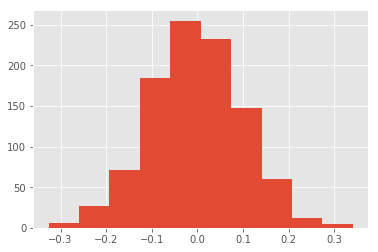

In [6]:
sess = tf.InteractiveSession()

n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n)

In [7]:
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')

B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')

Y_pred = X*W + B

In [2]:
def distance(p1, p2): #l1-norm
    return tf.abs(p1 - p2)

In [9]:
cost = tf.reduce_mean(distance(Y_pred, Y))

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.678875
0.527251
0.449745
0.419204
0.40704
0.401135
0.398093
0.396797
0.396292
0.39612
0.396007


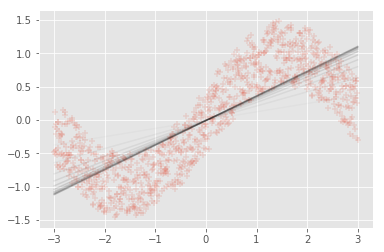

In [14]:
n_iterations = 500

fig, ax = plt.subplots(1,1)
ax.scatter(xs, ys, alpha=0.15, marker='+')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    prev_training_cost = 0.0
    
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X:xs, Y:ys})
        training_cost = sess.run(cost, feed_dict={X:xs, Y:ys})
        
        if it_i % 10 == 0:
            ys_pred = sess.run(Y_pred, feed_dict={X:xs})
            
            ax.plot(xs, ys_pred, 'k', alpha=it_i/n_iterations)
            fig.show()
            plt.draw()
            
            print(training_cost)
        
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
        
        prev_training_cost = training_cost

In [16]:
# batches - incorrect way of doing since always looking at data in same order

idxs = np.arange(100)
batch_size=10
n_batches = len(idxs) // batch_size

for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size: (batch_i + 1)*batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [17]:
rand_ixs = np.random.permutation(idxs)
batch_size = 10
n_batches = len(rand_ixs) // batch_size
print("Number of batches", n_batches)
for batch_i in range(n_batches):
    print(rand_ixs[batch_i*batch_size: (batch_i+1)*batch_size])

Number of batches 10
[66 80 92 72 98 43 56 67 33 55]
[91 20 76 35 78 14 18  4 27  9]
[48 13 75  2 87 86 31 57 60 52]
[61 16 47 63 84 21 46 39 40 74]
[15 71 73 83 54 19 59 82 97 99]
[36 11 29 28 23 51 17 38 89 68]
[95 65 69 94 77 34 70 81  6 93]
[22 30 37 96 32 53 12  7  8 45]
[24  5 10 85 49 25 79 26 44  3]
[64  1 42 41 90 88 62  0 50 58]


In [26]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
    fig, ax = plt.subplots(1,1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4,4])
    ax.set_ylim([-2,2])
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        prev_training_cost = 0.0
        
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs)//batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size : (batch_i + 1)*batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
            training_cost = sess.run(cost, feed_dict={X:xs, Y:ys})
            
            if it_i % 10 == 0:
                ys_pred = sess.run(Y_pred, feed_dict={X:xs})
                ax.plot(xs, ys_pred, 'k', alpha=it_i/n_iterations)
                print(training_cost)
    fig.show()
    plt.draw()

TypeError: unhashable type: 'numpy.ndarray'

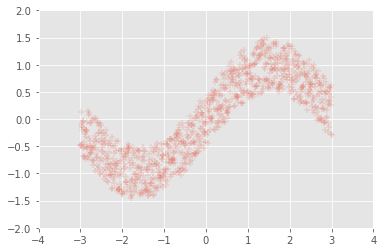

In [22]:
n_neurons = 100

W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

h = tf.matmul(tf.expand_dims(X,1), W) + b

Y_pred = tf.reduce_sum(h,1)

train(xs, ys, Y_pred)

In [23]:
sess = tf.InteractiveSession()

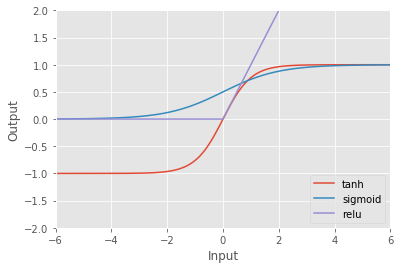

In [25]:
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6,6])
plt.ylim([-2,2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

InternalError: Blas SGEMM launch failed : a.shape=(200, 1), b.shape=(1, 10), m=200, n=10, k=1
	 [[Node: MatMul_3 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](ExpandDims_3, W/read)]]

Caused by op 'MatMul_3', defined at:
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-a1981bab18bc>", line 6, in <module>
    h = tf.nn.tanh(tf.matmul(tf.expand_dims(X,1), W)+b, name='h')
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1765, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 1454, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\itpstudent\Miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Blas SGEMM launch failed : a.shape=(200, 1), b.shape=(1, 10), m=200, n=10, k=1
	 [[Node: MatMul_3 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](ExpandDims_3, W/read)]]


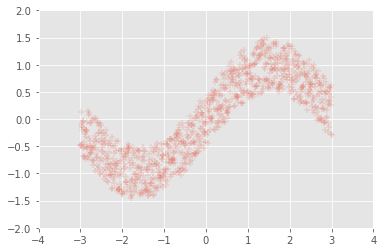

In [27]:
n_neurons = 10
W= tf.Variable(tf.random_normal([1, n_neurons]), name='W')

b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b')

h = tf.nn.tanh(tf.matmul(tf.expand_dims(X,1), W)+b, name='h')

Y_pred = tf.reduce_sum(h, 1)

train(X, Y, Y_pred)

In [28]:
def linear(X, n_input, n_output, activation=None):
    
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W')
    b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b, name='h')
    return h

In [29]:
from tensorflow.python.framework import ops

In [30]:
ops.reset_default_graph()

In [31]:
g = tf.get_default_graph()



X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10)

[op.name for op in g.get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'h']

In [10]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or 'linear'):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

In [33]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

g = tf.get_default_graph()

X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10, scope='layer1')

[op.name for op in g.get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add']

In [34]:
h2 = linear(h, 10, 10, scope='layer2')

h3 = linear(h2,10, 3, scope='layer3')

[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'layer2/W',
 'layer2/W/Assign',
 'layer2/W/read',
 'layer2/b/Initializer/Const',
 'layer2/b',
 'layer2/b/Assign',
 'layer2/b/read',
 'layer2/MatMul',
 'layer2/add',
 'layer3/W/Initializer/random_normal/shape',
 'layer3/W/Initializer/random_normal/mean',
 'layer3/W/Initiali

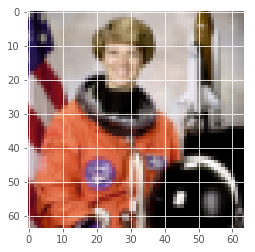

In [3]:
from skimage.data import astronaut
from scipy.misc import imresize

img = imresize(astronaut(), (64,64))
plt.imshow(img)

In [46]:
sess.close()

In [4]:
# collect all positions in the image in this list x,y -> row,col

xs = []

# collect corresponding colors for each position r,g,b

ys = []

# loop over image to fill above lists
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        xs.append([row_i, col_i])
        ys.append(img[row_i, col_i])

In [5]:
# convert lists to np arrays

xs = np.array(xs)
ys = np.array(ys)

In [6]:
# normalize the input

xs = (xs - np.mean(xs))/np.std(xs)

print("X",xs.shape)
print("Y",ys.shape)

X (4096, 2)
Y (4096, 3)


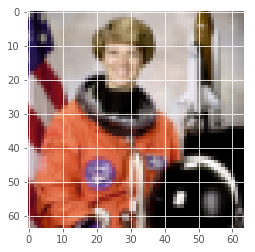

In [7]:
plt.imshow(ys.reshape(img.shape))

In [8]:
X = tf.placeholder(tf.float32, shape=[None,2], name='X')
Y = tf.placeholder(tf.float32, shape=[None,3], name='Y')

In [11]:
n_neurons = [2,64,64,64,64,64,64,3]

current_input = X

for layer_i in range(1, len(n_neurons)):
    current_input = linear(X=current_input,
                          n_input=n_neurons[layer_i-1],
                          n_output=n_neurons[layer_i],
                          scope='layer_'+str(layer_i),
                          activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None)
    
Y_pred = current_input

In [12]:
cost = tf.reduce_mean(tf.reduce_sum(distance(Y_pred, Y),1))

In [13]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

0 170.878
1 162.708
2 156.503
3 155.587
4 148.239
5 144.76
6 142.709
7 139.926
8 138.368
9 135.643
10 131.298
11 130.34
12 128.403
13 127.613
14 123.858
15 114.503
16 111.52
17 109.82
18 106.989
19 107.07


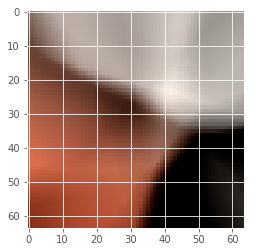

20 105.334
21 108.339
22 104.256
23 101.616
24 103.899
25 102.403
26 100.159
27 98.2934
28 107.393
29 96.1838
30 98.962
31 99.3692
32 99.7886
33 95.6596
34 94.7946
35 93.8905
36 94.1234
37 90.3303
38 88.5414
39 90.0132


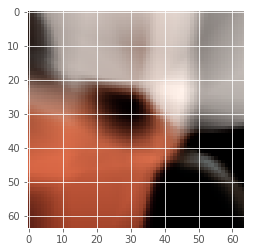

40 88.7282
41 88.4705
42 91.3437
43 87.6879
44 93.4368
45 87.5173
46 83.5203
47 85.675
48 82.2842
49 88.4153
50 85.7903
51 86.2425
52 83.2836
53 81.676
54 86.547
55 81.7662
56 83.2141
57 81.8218
58 81.5256
59 79.3898


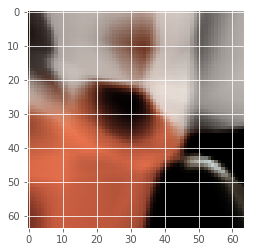

60 80.3662
61 78.7848
62 78.1636
63 82.9979
64 80.8844
65 82.5342
66 77.863
67 79.9654
68 79.5094
69 78.8682
70 78.2951
71 76.3874
72 83.0511
73 76.0848
74 75.3561
75 75.2912
76 73.9702
77 75.4075
78 78.5353
79 72.5812


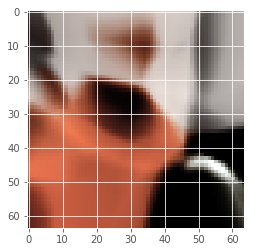

80 73.6114
81 75.7523
82 74.2201
83 72.5823
84 71.5837
85 75.7299
86 74.2525
87 75.3546
88 73.7686
89 70.448
90 72.9401
91 72.3874
92 72.721
93 70.3909
94 70.1479
95 72.2398
96 72.3505
97 79.2182
98 74.952
99 73.8655


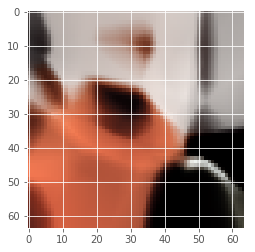

100 67.4901
101 70.3968
102 69.577
103 73.9924
104 68.7672
105 69.0955
106 74.1472
107 70.9886
108 70.9684
109 68.9533
110 69.0629
111 65.4878
112 66.8599
113 67.3924
114 66.5984
115 65.492
116 64.5315
117 64.668
118 66.9922
119 70.2308


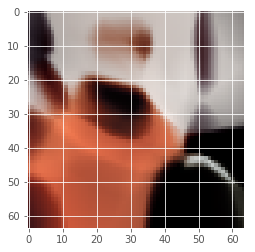

120 70.154
121 71.3512
122 65.078
123 66.3938
124 64.1705
125 64.3011
126 66.9917
127 67.2185
128 63.4683
129 67.7469
130 69.2999
131 66.0427
132 64.2595
133 67.3991
134 66.5644
135 67.5039
136 61.9966
137 67.7519
138 67.7047
139 74.6568


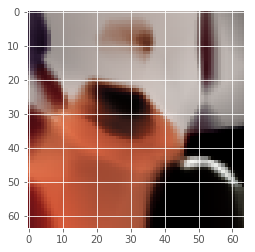

140 66.0193
141 61.5526
142 65.2081
143 67.1231
144 72.4936
145 65.959
146 64.0089
147 63.5635
148 63.4666
149 65.363
150 66.1227
151 63.871
152 65.1219
153 62.2665
154 66.1227
155 60.2322
156 63.7109
157 62.2562
158 64.2591
159 64.0808


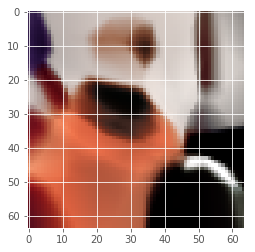

160 63.6313
161 59.0067
162 61.5944
163 62.2999
164 62.1164
165 59.3565
166 64.1496
167 62.3577
168 58.9225
169 62.0162
170 63.3482
171 65.4741
172 60.7526
173 60.408
174 59.1276
175 62.4682
176 63.9165
177 60.4554
178 60.0934
179 62.6819


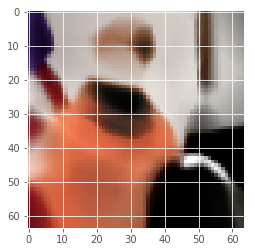

180 58.5423
181 63.925
182 65.0462
183 64.1785
184 59.4674
185 64.0612
186 61.0076
187 57.7848
188 57.1132
189 58.4501
190 58.2874
191 58.6073
192 62.0723
193 56.9408
194 61.3392
195 60.9779
196 58.7668
197 58.2747
198 58.0198
199 59.0144


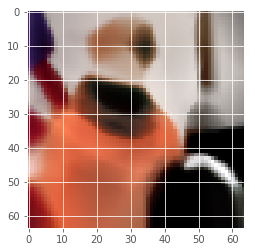

200 57.1106
201 58.3667
202 58.5734
203 58.4227
204 59.2984
205 60.9398
206 57.5585
207 59.3046
208 57.2805
209 57.8855
210 56.7472
211 57.7351
212 55.7232
213 55.9505
214 57.176
215 55.064
216 55.445
217 59.5774
218 61.3206
219 58.9569


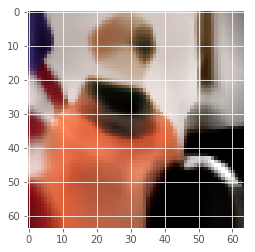

220 58.1848
221 56.3281
222 56.0874
223 55.6283
224 57.8013
225 55.965
226 61.23
227 58.2883
228 57.2677
229 59.1091
230 58.3461
231 54.6434
232 61.9574
233 56.0525
234 56.2896
235 57.6848
236 53.45
237 53.7315
238 54.8029
239 53.8295


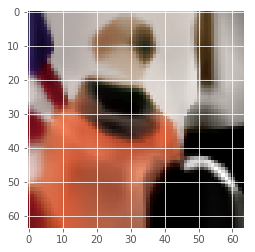

240 56.1543
241 54.4568
242 55.0907
243 56.7598
244 57.4763
245 58.2901
246 56.5169
247 54.8707
248 54.7431
249 53.7154
250 56.7222
251 54.4144
252 54.4254
253 54.0319
254 55.9185
255 56.2021
256 53.4469
257 50.7485
258 55.5621
259 54.6089


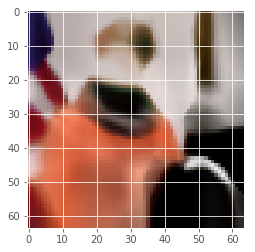

260 56.6703
261 56.4349
262 57.9951
263 51.5859
264 51.8653
265 54.4017
266 53.2809
267 52.3607
268 51.4565
269 52.0052
270 57.1985
271 54.0308
272 53.0437
273 52.5553
274 55.6043
275 56.8394
276 54.6473
277 53.4726
278 52.2838
279 50.3602


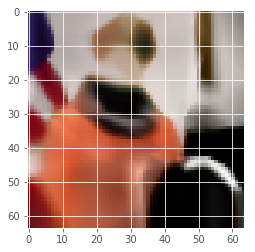

280 53.5428
281 52.2081
282 52.4524
283 49.2568
284 51.2684
285 49.9861
286 50.1546
287 48.233
288 54.9501
289 51.5979
290 54.9079
291 48.8463
292 49.4925
293 49.4978
294 48.3632
295 50.8891
296 51.4353
297 49.064
298 48.9642
299 54.7147


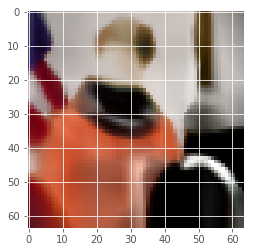

300 52.6737
301 54.8945
302 49.9822
303 55.3146
304 50.3408
305 48.8504
306 50.4657
307 55.2211
308 49.1104
309 47.7909
310 52.6845
311 50.7888
312 48.9774
313 48.0035
314 54.4599
315 47.54
316 51.9208
317 46.2603
318 47.6412
319 51.7445


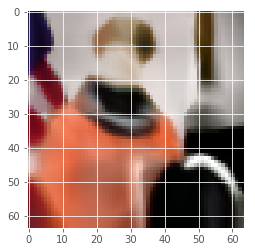

320 48.2395
321 46.9775
322 48.4733
323 52.2919
324 47.5105
325 46.8803
326 48.3938
327 49.2555
328 51.4435
329 48.7731
330 50.6601
331 51.3172
332 46.7857
333 48.3198
334 48.314
335 48.5071
336 48.9888
337 45.8563
338 50.6266
339 44.6477


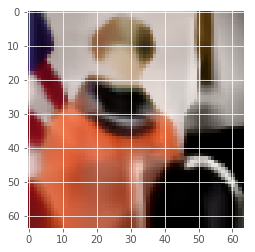

340 48.958
341 49.9635
342 46.7424
343 47.8378
344 47.0562
345 46.7878
346 49.2733
347 45.1467
348 48.1447
349 49.0149
350 46.9275
351 48.8153
352 47.5882
353 46.5502
354 48.8031
355 49.5488
356 47.4882
357 45.62
358 48.5243
359 45.8593


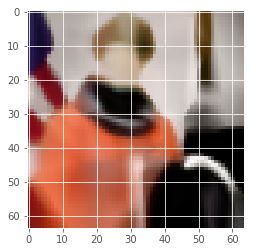

360 46.0903
361 45.4119
362 48.6429
363 46.4484
364 51.5415
365 44.2858
366 46.2987
367 46.5139
368 45.8074
369 46.1568
370 47.7654
371 46.4902
372 46.8218
373 48.8583
374 46.4018
375 47.1389
376 48.3774
377 48.6352
378 48.5401
379 47.0139


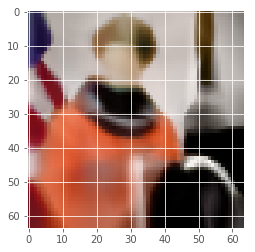

380 50.2498
381 44.5735
382 44.7057
383 44.5618
384 47.5198
385 44.5679
386 43.9117
387 46.0152
388 43.3639
389 46.1871
390 44.151
391 47.8911
392 44.6396
393 48.5675
394 46.1671
395 44.6928
396 45.1819
397 45.0937
398 44.4266
399 44.575


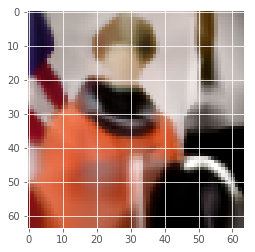

400 46.283
401 46.3771
402 45.9961
403 45.1008
404 44.9406
405 42.7985
406 44.0691
407 46.2536
408 46.1108
409 45.8208
410 45.2573
411 45.0161
412 43.7068
413 41.5974
414 42.4958
415 47.9228
416 46.8056
417 43.1822
418 47.7191
419 46.4549


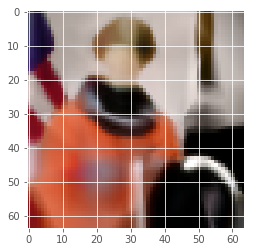

420 46.5227
421 45.3692
422 46.4442
423 41.9646
424 45.2144
425 40.514
426 41.0023
427 42.5798
428 45.3074
429 41.9099
430 43.977
431 41.775
432 44.0533
433 45.2641
434 40.9233
435 41.2106
436 41.898
437 39.7297
438 47.382
439 40.8169


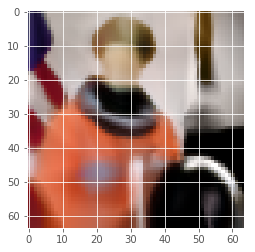

440 46.5429
441 40.8846
442 44.1247
443 39.9794
444 40.1901
445 41.1206
446 40.7274
447 42.6359
448 42.4586
449 40.5111
450 41.8353
451 40.071
452 42.6245
453 46.4727
454 45.1613
455 42.5374
456 42.9694
457 39.7927
458 39.7937
459 42.6279


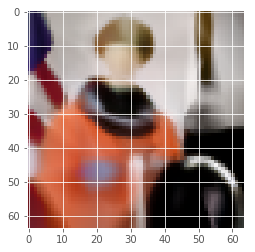

460 43.4869
461 39.3755
462 43.1937
463 41.1319
464 42.7288
465 41.4304
466 42.7358
467 41.3524
468 39.4743
469 41.426
470 39.4949
471 42.9348
472 40.1776
473 40.5625
474 43.2494
475 41.6249
476 42.9273
477 40.2067
478 40.716
479 40.0161


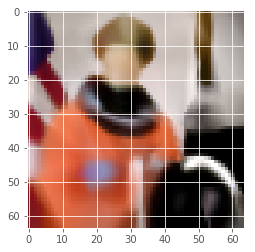

480 40.4798
481 40.4237
482 40.6404
483 40.2827
484 39.9719
485 42.077
486 38.6149
487 41.4811
488 38.3641
489 41.2109
490 39.2489
491 41.4651
492 41.4567
493 38.2113
494 38.945
495 39.205
496 39.0561
497 36.6998
498 40.4336
499 40.5226


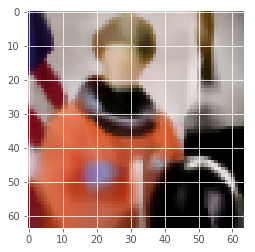

In [14]:
n_iterations = 500
batch_size = 50

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    prev_training_cost= 0.0
    
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i*batch_size:(batch_i+1)*batch_size]
            sess.run(optimizer, feed_dict={X:xs[idxs_i], Y:ys[idxs_i]})
        
        training_cost = sess.run(cost, feed_dict={X:xs, Y:ys})
        print(it_i, training_cost)
        
        if (it_i + 1)%20==0:
            ys_pred = sess.run(Y_pred, feed_dict={X:xs})
            fig,ax = plt.subplots(1,1)
            img = np.clip(ys_pred.reshape(img.shape),0,255).astype(np.uint8)
            plt.imshow(img)
            plt.show()

In [15]:
sess.close()